In [1]:
import pickle
import pandas
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
sns.color_palette("colorblind")


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [ ]:
def analyse_matchings(dataset_path = "final/LIAR"):
    dict_df = {}
    do_print = False
    for split in ["train", "dev", "test"]:
        path_in = "kg_emb_dump/"+dataset+"/"+thing+'_transe.pkl'
        with open(path_in, "rb") as f:
            ys = pickle.load(f)
        present_entities = []
        for i,(x,y) in enumerate(ys):
            for t in x:
                present_entities.append(t)           
        unique_entities = set(present_entities)
        present_split = set(present).intersection(unique_entities)
        count = Counter([f.lower() for f in split_df["entity"]])
        count_matched = 0
        for entity in present_split:
            count_matched = count_matched + count[entity]
            
        unique_concepts = len(unique_entities)
        unique_presnet = len(present_split)    
        total_concepts = len(split_df["entity"])
        len_missing = total_concepts - count_matched
        missing_concepts_proc = count_matched / total_concepts 
        
        dict_df[split] = {}
        dict_df[split]["unique_concepts"] = unique_concepts       
        dict_df[split]["unique_present_concepts"] = unique_presnet
        dict_df[split]["unique_present_concepts_%"] = unique_presnet/unique_concepts
        dict_df[split]["total_present"] = total_concepts
        dict_df[split]["total_found"] = count_matched
        dict_df[split]["missing_entities"] = len_missing
        dict_df[split]["present_entities_%"] = missing_concepts_proc


    data_frame = pd.DataFrame.from_dict(dict_df)
    print(data_frame)
        
        

In [95]:
def analyze(dataset, scale = "normal"):
    xx, ss = 0, 0
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))#, sharey=True)
    fig.suptitle('Distribution of concepts per split in ' + dataset +' dataset')
    for i,thing in enumerate(["train", "dev", "test"]):
        ax = axes[i]
        path_in = "kg_emb_dump/"+dataset+"/"+thing+'_transe.pkl'
        with open(path_in, "rb") as f:
            ys = pickle.load(f)
        cc = []
        yz = []
        for i,(x,y) in enumerate(ys):
            if scale == "log" and len(x) > 0:
                cc.append(np.log(len(x)))
            else:
                cc.append(len(x))
            yz.append(x)
                 
        cnt = Counter(cc)
        #if(thing == 'train'):
        xx = xx + cnt[0]
        ss = ss + len(cc)
        #print(thing, cnt[0], cnt[0]/len(cc)*100)
        #print(cnt[0])
        sns.histplot(cc,ax=ax)
        ax.set_title(thing + " split")
        plt.xlim(min(cc), max(cc))
        #plt.xlabel('concepts_appearing')
    plt.savefig("graphics/"+dataset+'_fuzzy_distb.pdf')
    plt.show()
    print(xx, xx/ss, xx/ss*100)

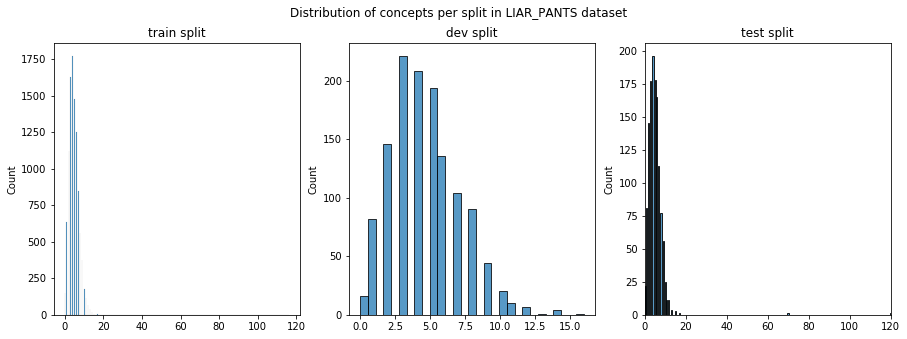

186 0.0145414744742397 1.45414744742397


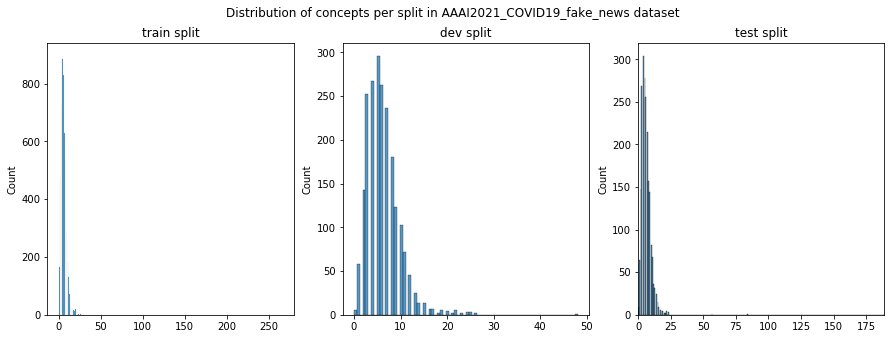

32 0.0029906542056074765 0.29906542056074764


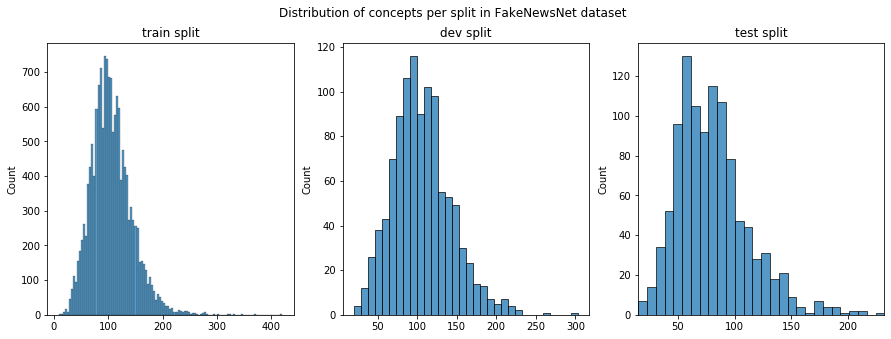

0 0.0 0.0


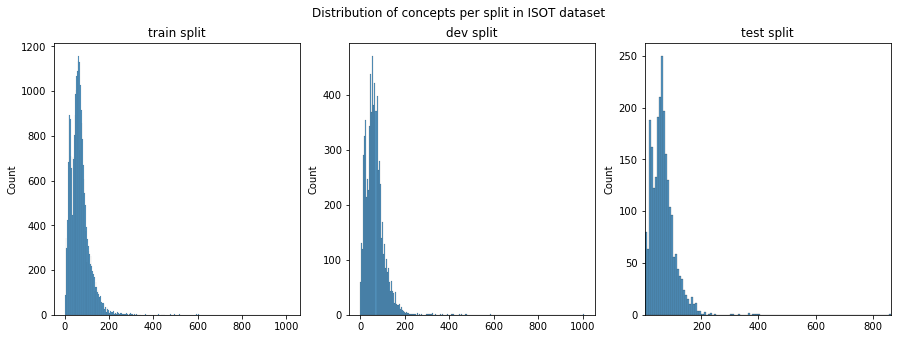

14 0.0003580104845927631 0.035801048459276306


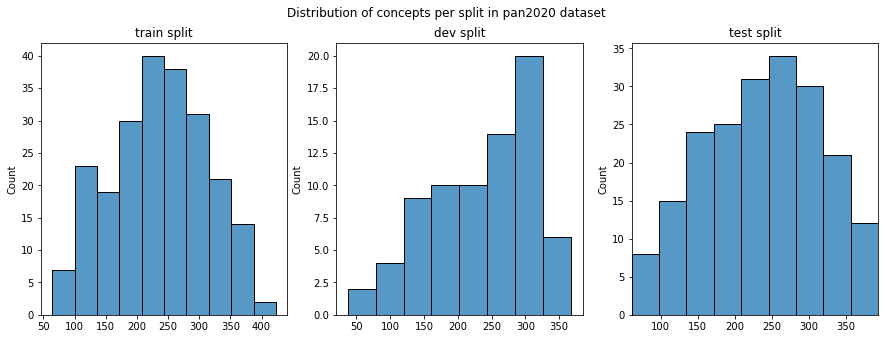

0 0.0 0.0


In [96]:
datasets = ["LIAR_PANTS","AAAI2021_COVID19_fake_news","FakeNewsNet", "ISOT", "pan2020"]
for dataset in datasets:
    analyze(dataset)

In [47]:
def analyze_entity(dataset, scale = "normal"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))#, sharey=True)
    fig.suptitle('Distribution of concepts per split in ' + dataset +' dataset')
    for i,thing in enumerate(["train", "dev", "test"]):
        ax = axes[i]
        path_in = "kg_emb_dump/"+dataset+"/"+thing+'_transe_speakers.pkl'
        with open(path_in, "rb") as f:
            ys = pickle.load(f)
        cc = []
        yz = []
        for i,(x,y) in enumerate(ys):
            if scale == "log" and len(x) > 0:
                cc.append(np.log(len(x)))
            else:
                cc.append(len(x))
            yz.append(x) sns.color_palette("colorblind")
                 
        cnt = Counter(cc)
        sns.histplot(cc,ax=ax)
        ax.set_title(thing + " split")
        plt.xlim(min(cc), max(cc))
        #plt.xlabel('concepts_appearing')
        #plt.savefig('outs.pdf')
    plt.show()


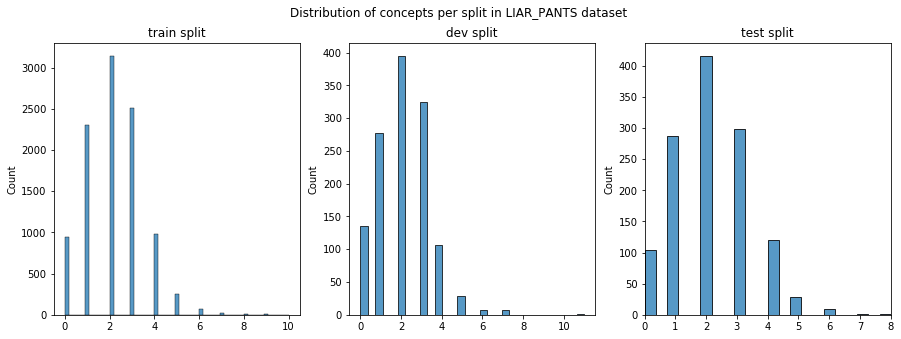

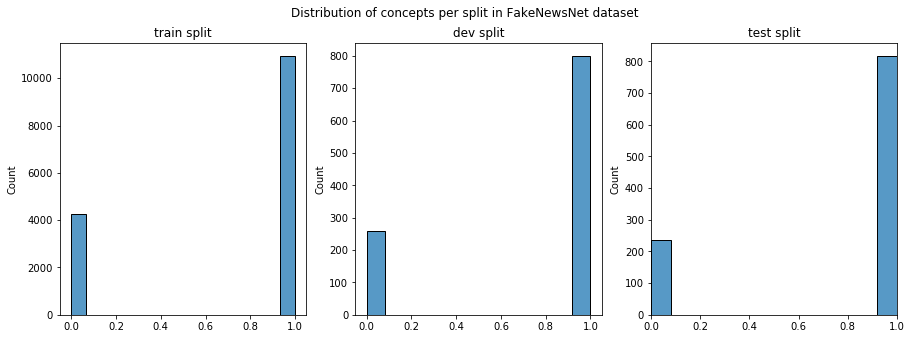

In [48]:
datasets = ["LIAR_PANTS","FakeNewsNet"]
for dataset in datasets:
    analyze_entity(dataset)

In [88]:

def analyze_kws(dataset, n = 30):
    ax = plt.gca()

    #fig, axes = plt.subplots(1, 1, figsize=(10, 5))#, sharey=True)
    #fig.suptitle('Most popular ' + str(n) + '  concepts per split in ' + dataset +' dataset')
    for i,thing in enumerate(["train"]):#, "dev", "test"]):
        #ax = axes[i]
        path_in = "kg_emb_dump/"+dataset+"/"+thing+'_complex_speakers.pkl'
        with open(path_in, "rb") as f:
            ys = pickle.load(f)
        cc = []
        yz = []
        kws_all = []
        for i,(x,y) in enumerate(ys):
            yz.append(x)
            for kw in x:
                kws_all.append(kw)
        cnt = Counter(kws_all)
        xs = []
        ys = []
        for x,y in cnt.most_common(n):
            xs.append(x)
            ys.append(y)
        #ys = np.log(ys)
        sns.barplot(x=ys,y=xs,ax=ax,palette='flare')#palette='flare')#="coolwarm")
        #ax.set_title(thing + " split")
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        #ax.set_yscale("log")
        #plt.xlim(0, n)
        #plt.ylim(0,10)
        #plt.xlabel('concepts_appearing')
    plt.savefig('graphics/'+dataset+'_entity_flare.png', dpi = 300,bbox_inches='tight', pad_inches = 0.0)
    plt.show()       

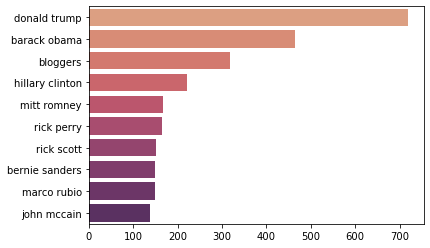

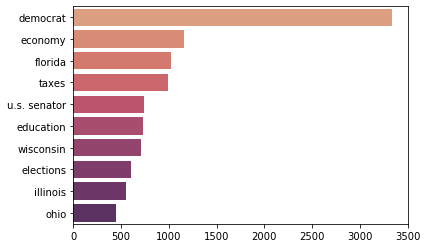

In [89]:
datasets = ["FakeNewsNet", "LIAR_PANTS"]#:#,"FakeNewsNet","AAAI2021_COVID19_fake_news","FakeNewsNet", "ISOT", "pan2020"]
for dataset in datasets:
    analyze_kws(dataset, n = 10)

In [79]:
sns.color_palette("colorblind")

def analyze_entity_words(dataset, n = 30):
    #ax = plt.gca()
    fig, axes = plt.subplots(1, 3, figsize=(8, 4))#, sharey=True)
    #fig.suptitle('Most popular ' + str(n) + '  concepts per split in ' + dataset +' dataset')
    for i,thing in enumerate(["train", "dev", "test"]):
        ax = axes[i]
        path_in = "kg_emb_dump/"+dataset+"/"+thing+'_complex_n.pkl'
        with open(path_in, "rb") as f:
            ys = pickle.load(f)
        cc = []
        yz = []
        kws_all = []
        for i,(x,y) in enumerate(ys):
            yz.append(x)
            for kw in x:
                kws_all.append(kw)
        cnt = Counter(kws_all)
        xs = []
        ys = []
        for x,y in cnt.most_common(n):
            xs.append(x)
            ys.append(y)
        #ys = np.log(ys)
        sns.barplot(x=xs,y=ys,ax=ax,color='gray')
        ax.set_title(thing + " split")
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        #plt.xlim(0, n)
        #plt.ylim(0,10)
        #plt.xlabel('concepts_appearing')


    plt.savefig('graphics/'+dataset+'_fuzzy_mono.pdf', dpi = 300,bbox_inches='tight', pad_inches = 0.0)
    fig.tight_layout(pad = 3.0)

    plt.show()       

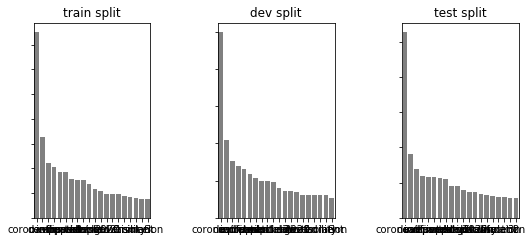

KeyboardInterrupt: 

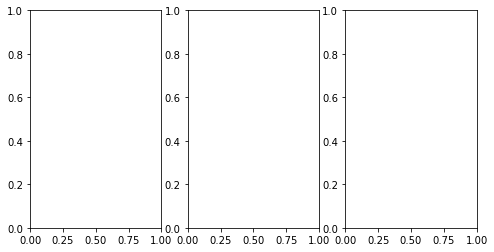

In [59]:
datasets = ["AAAI2021_COVID19_fake_news","FakeNewsNet","LIAR_PANTS","FakeNewsNet","pan2020"]
for dataset in datasets:
    analyze_entity_words(dataset, n = 20)

In [86]:

def analyze_entity_words_train(dataset, n = 30):
    ax = plt.gca()
    #fig, axes = plt.subplots(1, 1, figsize=(8, 4))#, sharey=True)
    #fig.suptitle('Most popular ' + str(n) + '  concepts per split in ' + dataset +' dataset')
    for i,thing in enumerate(["train"]):#, "dev", "test"]):
        #ax = axes
        path_in = "kg_emb_dump/"+dataset+"/"+thing+'_complex_n.pkl'
        with open(path_in, "rb") as f:
            ys = pickle.load(f)
        cc = []
        yz = []
        kws_all = []
        for i,(x,y) in enumerate(ys):
            yz.append(x)
            for kw in x:
                kws_all.append(kw)
        cnt = Counter(kws_all)
        xs = []
        ys = []
        for x,y in cnt.most_common(n):
            xs.append(x)
            ys.append(y)
        #ys = np.log(ys)
        sns.barplot(x=ys,y=xs,ax=ax,palette='flare')
        #ax.set_title(thing + " split")
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        #plt.xlim(0, n)
        #plt.ylim(0,10)
        #plt.xlabel('concepts_appearing')


    plt.savefig('graphics/'+dataset+'fuzzy_10.png', dpi = 300,bbox_inches='tight', pad_inches = 0.0)
    #fig.tight_layout(pad = 3.0)

    plt.show()       

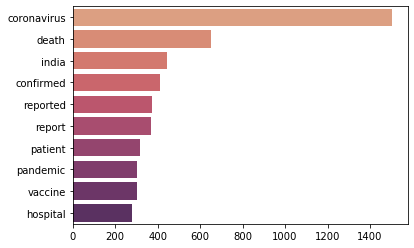

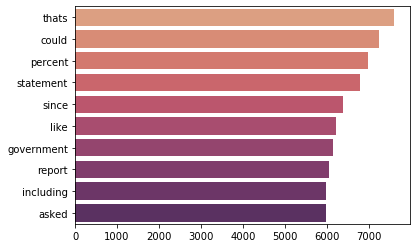

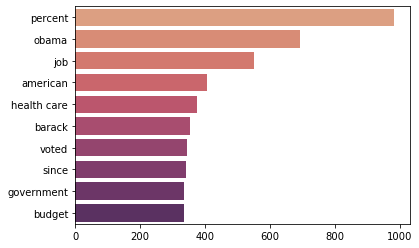

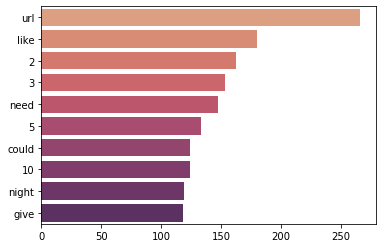

In [87]:
datasets = ["AAAI2021_COVID19_fake_news","FakeNewsNet","LIAR_PANTS","pan2020"]
for dataset in datasets:
    analyze_entity_words_train(dataset, n = 10)